<a href="https://colab.research.google.com/github/emon5369/Plant_Disease_Classifier/blob/main/Plant_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setup kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 76% 250M/329M [00:00<00:00, 764MB/s] 
100% 329M/329M [00:02<00:00, 139MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/plant-village.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models, layers, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# Create data generators
# Assuming your extracted dataset is in '/content/plantvillage'
train_generator = train_datagen.flow_from_directory(
    '/content/PlantVillage',
    target_size=(256, 256), # Specify your desired image size
    batch_size=32,
    class_mode='sparse', # Or 'binary' if you have only two classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/PlantVillage',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)



Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,159 (13.18 MB)

 Trainable params: 3,454,159 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 324s 609ms/step - accuracy: 0.4186 - loss: 1.7647 - val_accuracy: 0.7678 - val_loss: 0.6915
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 310s 601ms/step - accuracy: 0.7880 - loss: 0.6421 - val_accuracy: 0.8401 - val_loss: 0.4767
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 311s 602ms/step - accuracy: 0.8498 - loss: 0.4458 - val_accuracy: 0.8721 - val_loss: 0.3762
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 313s 605ms/step - accuracy: 0.8811 - loss: 0.3396 - val_accuracy: 0.9119 - val_loss: 0.2734
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 337s 652ms/step - accuracy: 0.9138 - loss: 0.2600 - val_accuracy: 0.9098 - val_loss: 0.2761
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 302s 584ms/step - accuracy: 0.9290 - loss: 0.2022 - val_accuracy: 0.9221 - val_loss: 0.2315
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 304s 587ms/step - accuracy: 0.9389 - loss: 0.1723 - val_accuracy: 0.9287 - val_loss: 0.2077
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 304s 589ms/step - accuracy: 0.9428 -

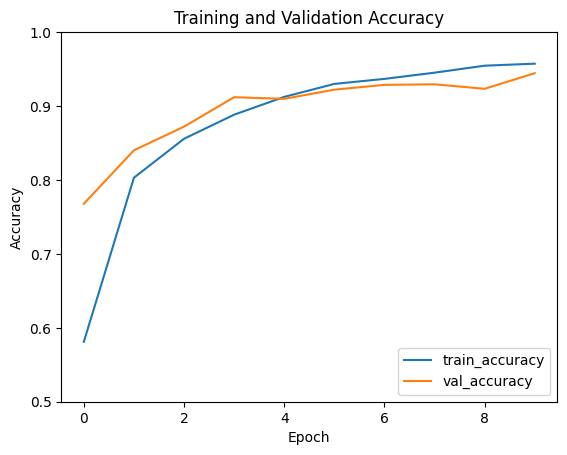

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

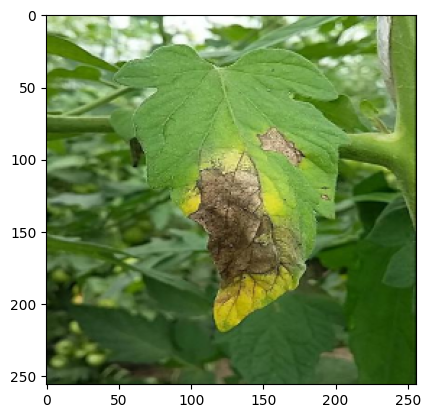

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted class for the image is: Tomato_Early_blight


In [ ]:
# Make a prediction on a new image
new_image_path = '/content/tomato.jpg'

# Load and preprocess the new image
img = cv2.imread(new_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
img = cv2.resize(img, (256, 256)) # Resize to the target size used for training
img_array = np.expand_dims(img, axis=0) # Add a batch dimension
img_array = img_array / 255.0 # Rescale
#show image
plt.imshow(img)
plt.show()

# Make a prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class for the image is: {predicted_class_name}")

In [ ]:
model.save('plant_village.h5')

In [ ]:
model_number = 1
model.export(f'/content/model/{model_number}')

Saved artifact at '/content/model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  138014684759248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138016524170064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138016524173136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138016524171792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138016524169872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138013785827920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138016524170256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138013785828496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138013785832336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138013785833296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1380137858317

In [ ]:
# import shutil
# import os

# # Define the directory where the model was saved
# model_dir = f'/content/model/{model_number}'
# # Define the path for the zip file
# zip_path = f'/content/plant_village_model_{model_number}.zip'

# # Create a zip archive of the model directory
# shutil.make_archive(zip_path.replace('.zip', ''), 'zip', model_dir)

# print(f"Model compressed to {zip_path}")

Model compressed to /content/plant_village_model_1.zip


In [ ]:
# from google.colab import files

# # Download the zip file
# files.download(zip_path)